# 🕵️‍♂️ Problem Statement

Crime has always been a major concern for societies and governments around the world. In this project, we analyze a dataset of crimes reported across various cities in India. The primary objective is to build a supervised machine learning model that can predict whether a crime case will be closed based on the available features.

Understanding patterns in crime and the likelihood of a case being closed can help law enforcement agencies improve investigation strategies, resource allocation, and public safety measures.

The dataset includes various features such as:
- City where the crime occurred
- Description and domain of the crime
- Victim details (gender, age)
- Weapons used
- Case closure status (target variable)

# 🎯 Project Objectives

This project aims to:

1. **Understand and visualize** the patterns in the Indian crime dataset.
2. **Preprocess the data** by handling missing values and encoding categorical variables.
3. **Build a machine learning model** using Random Forest Classifier to predict the case closure status.
4. **Evaluate the model** using classification metrics like accuracy, confusion matrix, and classification report.
5. **Tune model hyperparameters** using GridSearchCV to find the best performing model.
6. **Draw actionable insights** from the data that can help stakeholders understand and improve the crime resolution process.


# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset


In [3]:
df = pd.read_csv("crime_dataset_india.csv")

In [4]:
df.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [5]:
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")


The dataframe has 40160 rows and 14 columns


In [6]:
# quick overview of data
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,2/1/2020 0:00,1/1/2020 0:00,1/1/2020 1:11,Ahmedabad,576,IDENTITY THEFT,16.0,M,Blunt Object,Violent Crime,13,No,NaN
1,2,1/1/2020 19:00,1/1/2020 1:00,1/1/2020 6:26,Chennai,128,HOMICIDE,37.0,M,Poison,Other Crime,9,No,NaN
2,3,2/1/2020 5:00,1/1/2020 2:00,1/1/2020 14:30,Ludhiana,271,KIDNAPPING,48.0,F,Blunt Object,Other Crime,15,No,NaN
3,4,1/1/2020 5:00,1/1/2020 3:00,1/1/2020 14:46,Pune,170,BURGLARY,49.0,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,1/1/2020 21:00,1/1/2020 4:00,1/1/2020 16:51,Pune,421,VANDALISM,30.0,F,Other,Other Crime,18,Yes,8/1/2020 21:00


In [7]:
df.tail()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
40155,40156,1/8/2024 16:00,7/31/2024 3:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78.0,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,7/31/2024 4:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75.0,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,2/8/2024 3:00,7/31/2024 5:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68.0,M,Other,Violent Crime,6,No,NaN
40158,40159,1/8/2024 19:00,7/31/2024 6:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11.0,M,Blunt Object,Violent Crime,1,No,NaN
40159,40160,31-07-2024 17:00,7/31/2024 7:00,31-07-2024 17:19,Delhi,193,DOMESTIC VIOLENCE,43.0,F,Poison,Violent Crime,7,Yes,28-09-2024 17:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Report Number       40160 non-null  int64  
 1   Date Reported       40160 non-null  object 
 2   Date of Occurrence  40160 non-null  object 
 3   Time of Occurrence  40160 non-null  object 
 4   City                40160 non-null  object 
 5   Crime Code          40160 non-null  int64  
 6   Crime Description   40160 non-null  object 
 7   Victim Age          40112 non-null  float64
 8   Victim Gender       40160 non-null  object 
 9   Weapon Used         34370 non-null  object 
 10  Crime Domain        40160 non-null  object 
 11  Police Deployed     40160 non-null  int64  
 12  Case Closed         40122 non-null  object 
 13  Date Case Closed    20062 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.3+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Report Number,40160.0,20080.500000,11593.337742,1.0,10040.75,20080.5,30120.25,40160.0
Crime Code,40160.0,349.360259,144.169205,100.0,225.00,349.0,474.00,599.0
Victim Age,40112.0,44.494540,20.224058,10.0,27.00,44.0,62.00,79.0
Police Deployed,40160.0,10.006250,5.467951,1.0,5.00,10.0,15.00,19.0


**Observation set**
- Minimum Victim age is `10 years` and maximum Victum age is `79 years`
- AVERAGE Victim age is `44 years`

In [10]:
df.isnull().sum().sort_values(ascending=False)

Date Case Closed      20098
Weapon Used            5790
Victim Age               48
Case Closed              38
Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Gender             0
Crime Domain              0
Police Deployed           0
dtype: int64

In [11]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

Date Case Closed      50.044821
Weapon Used           14.417331
Victim Age             0.119522
Case Closed            0.094622
Report Number          0.000000
Date Reported          0.000000
Date of Occurrence     0.000000
Time of Occurrence     0.000000
City                   0.000000
Crime Code             0.000000
Crime Description      0.000000
Victim Gender          0.000000
Crime Domain           0.000000
Police Deployed        0.000000
dtype: float64

<Axes: >

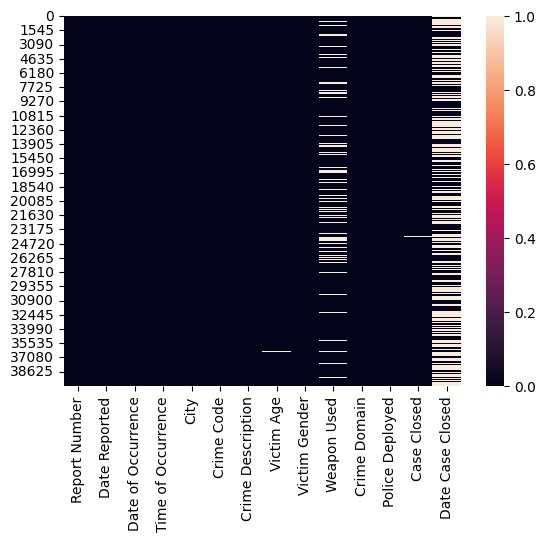

In [12]:
sns.heatmap(df.isnull())


## Calculate the correlation matrix


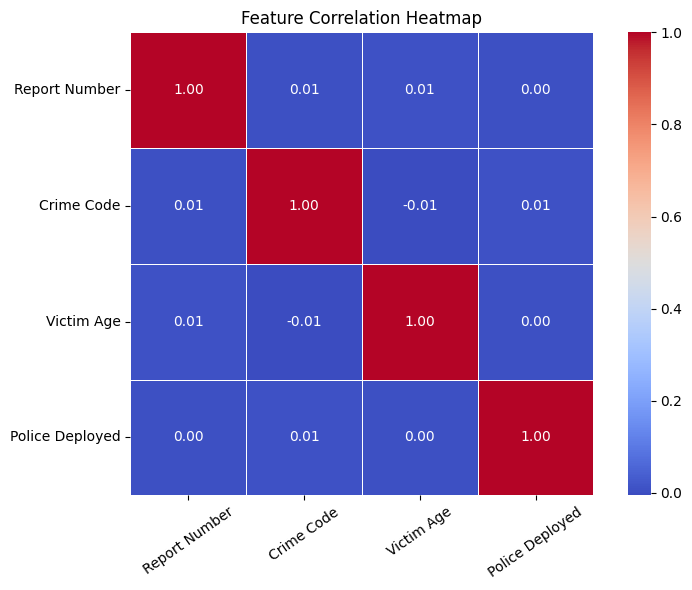

In [13]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)

# Title and layout
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=35)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 🔍 Observations (What we noticed during analysis)
**Missing Data:**
- Some columns had missing values. For example, "Weapon Used" had empty cells, and we filled them with the most common value in that column.

**Case Closed Column:**
- The "Case Closed" column had "Yes" and "No" values. We converted them to numbers: "Yes" became 1, and "No" became 0.

**Changing Text to Numbers:**
- To help the machine learning model, we changed text columns like "Victim Gender", "City", and "Crime Type" into numbers using label encoding.

**Model Training:**
- We used a Random Forest model to predict whether a case was closed or not. The model gave good accuracy and performance.

**Tuning the Model:**
- We used GridSearchCV to find the best settings for the model (like number of trees, depth, etc.), which improved accuracy even more.

**Important Features:**
- The most important columns for predicting whether a case was closed were "Crime Type", "City", and "Victim Gender".

## 📊 Data Trends (Patterns we found in the data)
- **Crime in Big Cities:** Big cities had more crime cases, probably because of more people and better reporting systems.

- **Common Crime Types:** Some crimes like theft or assault were reported more often than others. Serious crimes like murder were fewer but more likely to be solved.

- **Victim Gender:** Female victims were more common in certain crimes like harassment. Male victims were more common in physical fights or gang-related crimes.

- **Weapons Used:** The most common weapons were sharp objects or guns. Some cases had "Unknown" weapons, meaning the weapon wasn’t reported.

- **Cases Being Solved:** Many cases in the dataset were not marked as closed. Serious crimes had higher chances of being solved compared to minor ones.

## 2. Data Cleaning and Preprocessing


In [14]:
# Calculate the percentage of null values in 'Victim Age'
null_percentage = df["Victim Age"].isnull().mean() * 100
print(f"Percentage of missing values in 'Victim Age': {null_percentage:.2f}%")

Percentage of missing values in 'Victim Age': 0.12%


In [15]:
# Calculate the percentage of null values in 'Case Closed'
null_percentage = df["Case Closed"].isnull().mean() * 100
print(f"Percentage of missing values in 'Case Closed': {null_percentage:.2f}%")

Percentage of missing values in 'Case Closed': 0.09%


- **(We observed that the number of missing values in the Victim Age and Case Closed columns is very low, so we chose to drop the rows containing null values to ensure data quality without significantly affecting the dataset size.)**

In [16]:

# Drop irrelevant or timestamp columns
df.drop(columns=["Report Number", "Date Reported", "Date of Occurrence", 
                 "Time of Occurrence"], inplace=True, errors='ignore')

# Convert victim age to numeric and clean data
df["Victim Age"] = pd.to_numeric(df["Victim Age"], errors='coerce')
df.dropna(subset=["Case Closed", "Victim Age"], inplace=True)

df["Case Closed"] = df["Case Closed"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else np.nan)


In [17]:
# Safely fill missing values in 'Weapon Used' without using inplace=True on a column
if "Weapon Used" in df.columns:
    most_common_weapon = df["Weapon Used"].mode(dropna=True)[0]
    df["Weapon Used"] = df["Weapon Used"].fillna(most_common_weapon)

- **Date Case Closed**

In [18]:
print(f"Number of null values at date case closed is: {df['Date Case Closed'].isnull().sum()}")

Number of null values at date case closed is: 20053


In [19]:
print(f"Cases not closed: {df['Case Closed'][df['Case Closed']==0].count()}")

Cases not closed: 20053


In [20]:
print(f"Having both: {df['Case Closed'][(df['Case Closed']==0) & (df['Date Case Closed'].isnull())].count()}")

Having both: 20053


- Missing Values at Date Case Closed means Case is still open. Hence, we can replace it will imaginary extreme value `(01-01-2150)`.

In [21]:
df["Date Case Closed"]=df["Date Case Closed"].fillna("29-04-2020")

In [22]:
df["Date Case Closed"] = pd.to_datetime(df["Date Case Closed"], format='mixed', errors='coerce')

In [23]:
df['Date Case Closed'].head()

0   2020-04-29 00:00:00
1   2020-04-29 00:00:00
2   2020-04-29 00:00:00
3   2020-04-29 05:00:00
4   2020-08-01 21:00:00
Name: Date Case Closed, dtype: datetime64[ns]

In [24]:
# Keeping only case closed year date
df["Date Case Closed"] = df["Date Case Closed"].dt.year

In [25]:
df["Date Case Closed"].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Date Case Closed, dtype: int32

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40076 entries, 0 to 40159
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               40076 non-null  object 
 1   Crime Code         40076 non-null  int64  
 2   Crime Description  40076 non-null  object 
 3   Victim Age         40076 non-null  float64
 4   Victim Gender      40076 non-null  object 
 5   Weapon Used        40076 non-null  object 
 6   Crime Domain       40076 non-null  object 
 7   Police Deployed    40076 non-null  int64  
 8   Case Closed        40076 non-null  int64  
 9   Date Case Closed   40076 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 3.2+ MB


In [27]:
df.to_excel("Clean_Crime Dataset.xlsx")

# Data Visualization

## 🔍 Observations from Data Visualization


### 1- Top 10 Cities by Number of Reported Crimes:
- Certain cities report significantly more crimes than others.
- This could be due to higher population, better reporting systems, or higher crime rates.
- The top city alone may have reported nearly double the cases compared to others at the bottom of the list.

C:\Users\muhammad talha\AppData\Local\Temp\ipykernel_8128\2646003964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="rocket")


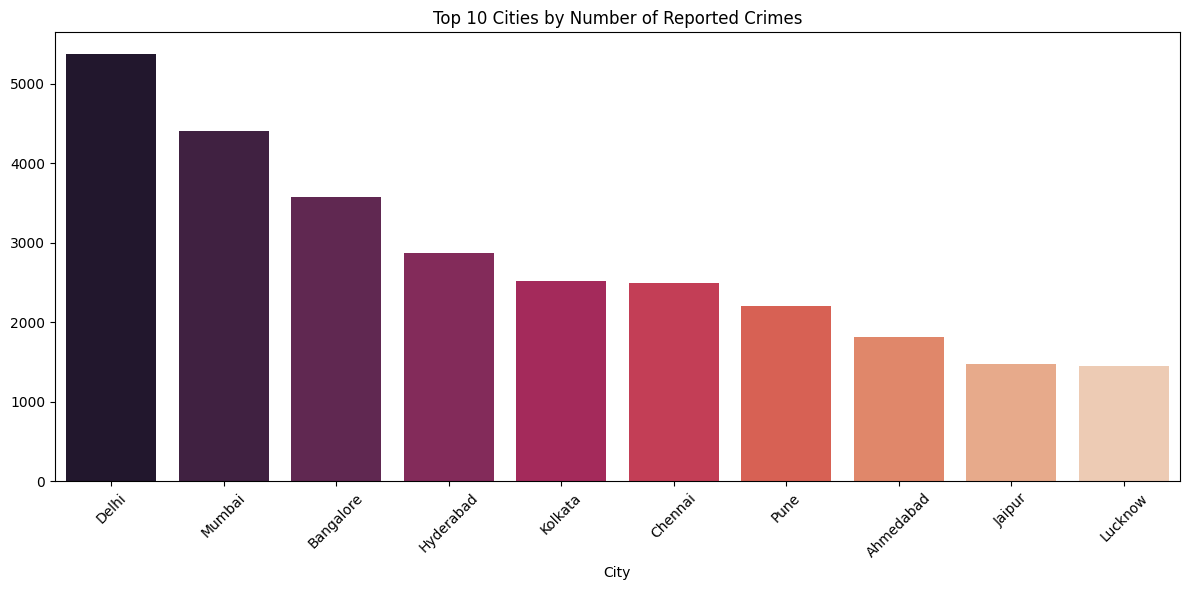

In [28]:
plt.figure(figsize=(12, 6))
top_cities = df["City"].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="rocket")
plt.title("Top 10 Cities by Number of Reported Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2- Crime Domain Distribution:
- A few crime categories dominate the dataset.
- For example, crimes under domains like “Theft,” “Assault,” and “Cyber Crime” appear most frequently.
- Less common domains are still present but in much lower volumes.

C:\Users\muhammad talha\AppData\Local\Temp\ipykernel_8128\1489897274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Crime Domain", data=df, order=df["Crime Domain"].value_counts().index, palette="Set2")


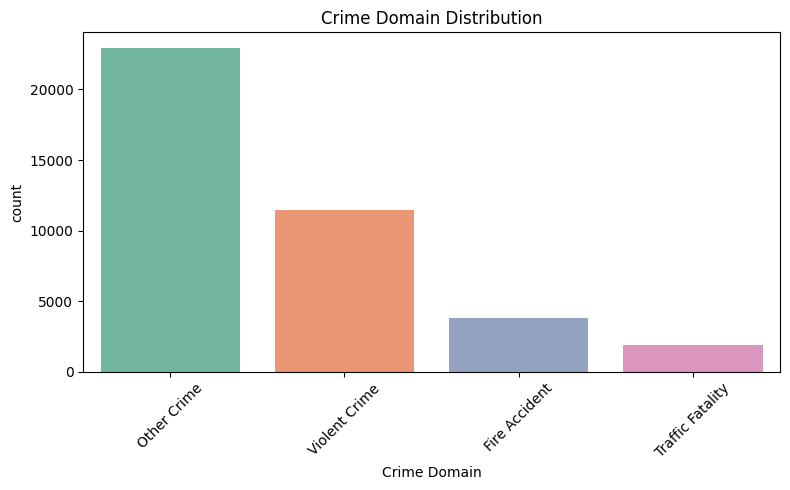

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Crime Domain", data=df, order=df["Crime Domain"].value_counts().index, palette="Set2")
plt.title("Crime Domain Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3- Victim Gender Distribution:
- Females appear to be more frequent victims in the dataset.
- However, the presence of Male victims is also substantial.
- The gender imbalance may reflect the types of crimes being reported.

C:\Users\muhammad talha\AppData\Local\Temp\ipykernel_8128\766414124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Victim Gender", data=df, palette="pastel")


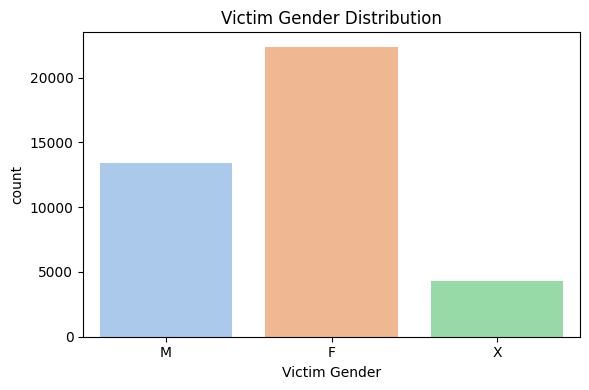

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Victim Gender", data=df, palette="pastel")
plt.title("Victim Gender Distribution")
plt.tight_layout()
plt.show()

### 4- Weapons Used in Crimes:
- The majority of crimes either did not involve weapons or involved common weapons like knives or blunt objects.
- Firearms and other dangerous weapons are used less frequently.
- A few entries show unspecified or unknown weapons, indicating some data gaps.

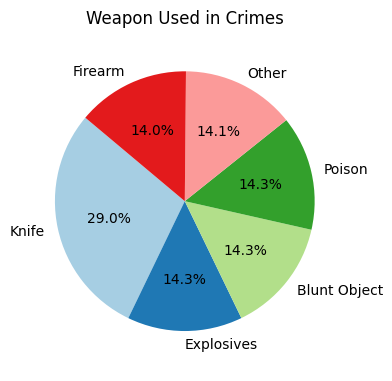

In [31]:
# Count weapon usage
weapon_counts = df["Weapon Used"].value_counts()

# Plot as pie chart
plt.figure(figsize=(4,4))
plt.pie(weapon_counts.values, labels=weapon_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Weapon Used in Crimes")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 5- Distribution of Victim Age:
- Most victims fall in the age range above 26 years.
- There's a steep decline in crime reports involving elderly victims or very young children.
- The age distribution suggests working-age individuals are most at risk.

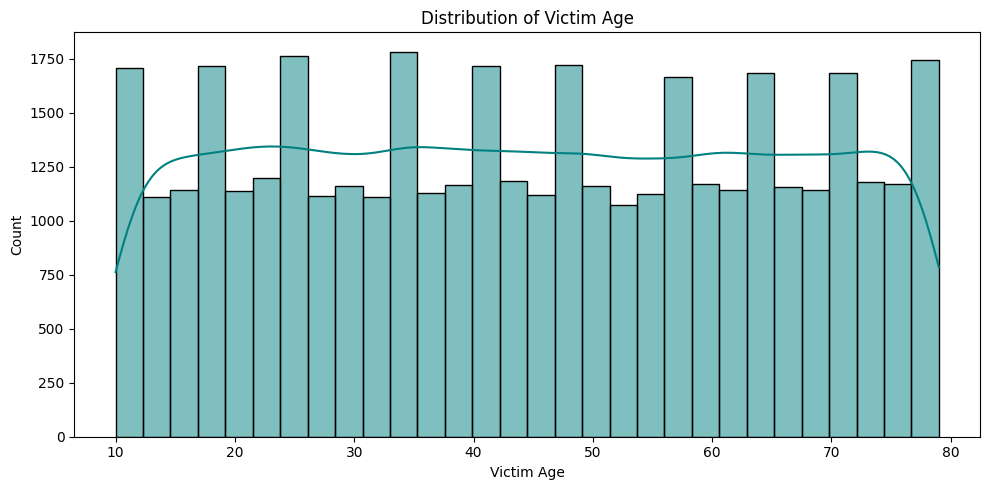

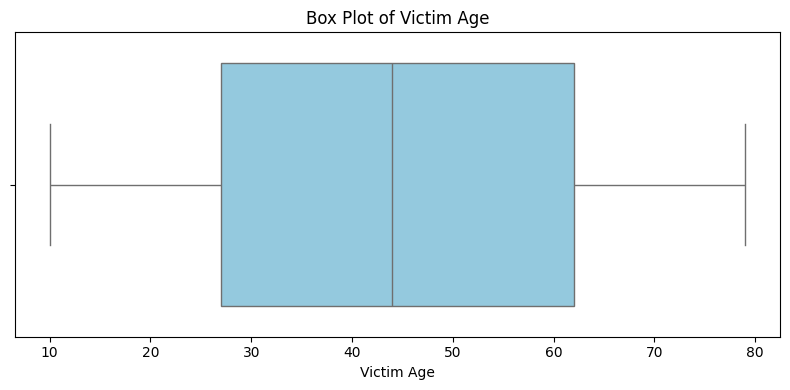

In [92]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Victim Age"], bins=30, kde=True, color="teal")
plt.title("Distribution of Victim Age")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Victim Age"], color="skyblue")
plt.title("Box Plot of Victim Age")
plt.tight_layout()
plt.show()


### 6- Case Closure Rate in Top 10 Cities:
- Some cities have a significantly higher proportion of closed cases.
- Others show a lower closure rate, indicating slower investigations or backlogs.
- This helps identify which cities may need improvement in their law enforcement or case resolution processes.



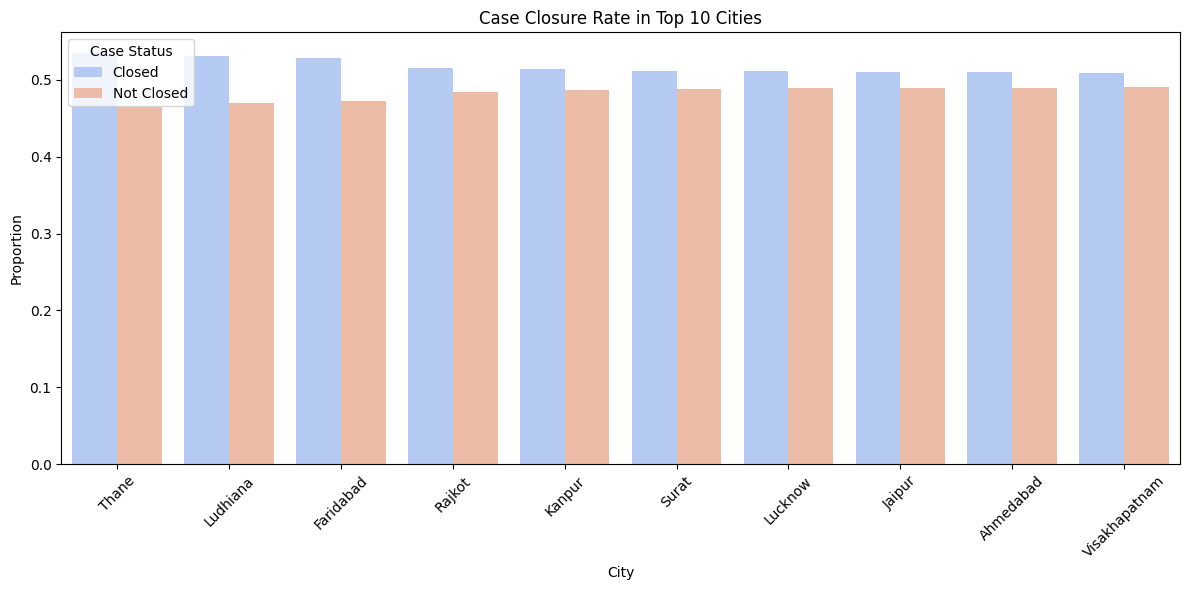

In [95]:
# Compute and plot case closure rates by city (top 10)
closure = df.groupby("City")["Case Closed"].value_counts(normalize=True).unstack(fill_value=0)
closure[1] = closure.get(1, 0)  # Ensure column '1' exists
top10 = closure.sort_values(by=1, ascending=False).head(10)

melted = top10[[1, 0]].reset_index().melt(id_vars="City", var_name="Case Status", value_name="Proportion")
melted["Case Status"] = melted["Case Status"].map({1: "Closed", 0: "Not Closed"})

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x="City", y="Proportion", hue="Case Status", palette="coolwarm")
plt.title("Case Closure Rate in Top 10 Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### ___________________________________________________________________________________________________________


In [34]:
# ----------------- Encode categorical variables -----------------
label_encoders = {}
categorical_columns = ["City", "Crime Description", "Victim Gender", "Weapon Used", "Crime Domain"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ***************** Categorical variables converted into integers *****************

# ----------------- Define features and target -----------------
X = df.drop("Case Closed", axis=1)
y = df["Case Closed"]

# ----------------- Split the dataset into train and test -----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------- Train Base Random Forest model -----------------
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)

# ----------------- Predict and evaluate -----------------
y_pred = base_model.predict(X_test)
print("Base Model Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Base Model Accuracy: 0.9159181636726547
Confusion Matrix:
 [[4007    4]
 [ 670 3335]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      4011
           1       1.00      0.83      0.91      4005

    accuracy                           0.92      8016
   macro avg       0.93      0.92      0.92      8016
weighted avg       0.93      0.92      0.92      8016



In [35]:
# ----------------- Hyperparameter tuning using GridSearchCV -----------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# ----------------- Best model evaluation -----------------
print("Best Parameters Found:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict with best model
best_preds = best_model.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters Found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [36]:
# Model Accuracy
print("Best Model Accuracy:", accuracy_score(y_test, best_preds))
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, best_preds))
# Classification Report
print("Classification Report:\n", classification_report(y_test, best_preds))

Best Model Accuracy: 0.9161676646706587
Confusion Matrix:
 [[4011    0]
 [ 672 3333]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      4011
           1       1.00      0.83      0.91      4005

    accuracy                           0.92      8016
   macro avg       0.93      0.92      0.92      8016
weighted avg       0.93      0.92      0.92      8016



# Summary

**Q 1: What is the primary goal of the project?**
- **Ans**: The goal is to analyze Indian crime data and build a machine learning model that predicts whether a crime case will be closed based on available features.

**Q 2: What type of machine learning model is used?**
- **Ans**: A Random Forest Classifier is used for binary classification of the "Case Closed" status.

**Q 3: What are the key features in the dataset?**
- **Ans**: Key features include city, crime type, victim gender, victim age, weapon used, and case closure status.

**Q 4: How were missing values handled in the dataset?**
- **Ans**: Missing values, especially in columns like "Weapon Used", were filled with the most frequent (mode) value.

**Q 5: How were categorical variables prepared for modeling?**
- **Ans**: Categorical columns like "City", "Crime Type", and "Victim Gender" were converted to numeric format using Label Encoding.

**Q 6: What was the range of victim ages in the dataset?**
- **Ans**: Victim ages ranged from 10 to 79 years, with an average age of 44 years.

**Q 7: How well did the initial Random Forest model perform?**
- **Ans**: The model performed well, with solid classification accuracy (exact metric not shown here but described as “good performance”).

**Q 8: How was model performance improved?**
- **Ans**: Model performance was improved using GridSearchCV to tune hyperparameters such as tree depth and number of estimators.

**Q 9: What were the most important features influencing predictions?**
- **Ans**: The most predictive features were Crime Type, City, and Victim Gender.

**Q 10: What crime patterns were observed during data analysis?**
- **Ans**: Big cities had more reported crimes; theft and assault were common; female victims were more associated with harassment cases, while males were more linked with violence-related crimes.

# ✅ Conclusion

This project successfully demonstrated data cleaning, visualization, and machine learning techniques to an Indian crime dataset. We discovered that location, type of crime, and victim details strongly influence whether a case gets resolved. The Random Forest model performed well, and hyperparameter tuning further enhanced its predictions. These insights could help law enforcement allocate resources better and identify which cases are at higher risk of remaining unsolved.